In [2]:
import pymysql
import pandas as pd
import sqlite3
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

userName = 'sqluser'
userPass = 'password'

In [3]:
conn=pymysql.connect(host='localhost',port=int(3306), user=userName, passwd=userPass, db='airline')
tableNames = pd.read_sql_query('Show Tables', conn)
print(tableNames)

           Tables_in_airline
0        airportcode_weather
1            airportid_table
2               l_airline_id
3                  l_airport
4               l_airport_id
5           l_airport_seq_id
6             l_cancellation
7           l_city_market_id
8                l_deparrblk
9       l_distance_group_250
10              l_diversions
11                  l_months
12     l_ontime_delay_groups
13                l_quarters
14      l_state_abr_aviation
15              l_state_fips
16         l_unique_carriers
17                l_weekdays
18        l_world_area_codes
19              l_yesno_resp
20  on_time_performance_2016


### Rename main airline table:

In [70]:
rename_table = pd.read_sql("ALTER TABLE on_time_on_time_performance_2016_1 RENAME to on_time_performance_2016", conn)

### Read in database main table on_time_on_time_performance_2016_1:

In [71]:
airline_flights_table = pd.read_sql_query('SELECT * FROM on_time_performance_2016', conn)
airline_flights_table.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN


In [72]:
# Explore Airline data:
airline_flights_table['UniqueCarrier'].unique()

array(['AA', 'AS', 'B6', 'DL', 'F9', 'OO', 'HA', 'NK', 'EV', 'UA', 'WN',
       'VX'], dtype=object)

In [ ]:
airline_flights_table.shape

(445827, 83)

### Read in weather csv file:

In [ ]:
### Load the Data in its original form:
WeatherUS = pd.read_csv('WeatherEvents_Jan2016-Dec2021.csv')
WeatherUS = WeatherUS[ WeatherUS[ 'StartTime(UTC)' ].str.contains( '2016' )==True ]
WeatherUS = WeatherUS.drop(['LocationLat','LocationLng','TimeZone','County','ZipCode'], axis=1)
WeatherUS.to_csv('WeatherUS_2016.csv')

In [4]:
Weather_df = pd.read_csv('WeatherUS_2016.csv')
Weather_df.sample(5)

#Airports_df = pd.read_csv('Airports.csv')
#Airports_df.sample(5)

,Unnamed: 0,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
657628,4185377,W-4239832,Rain,Light,2016-06-06 18:53:00,2016-06-06 20:53:00,0.08,US/Eastern,KECP,30.3490,-85.7880,Panama City,Bay,FL,32409.0
409297,2609228,W-2643440,Fog,Severe,2016-07-17 10:20:00,2016-07-17 10:40:00,0.00,US/Eastern,KMWK,36.4567,-80.5548,Mount Airy,Surry,NC,27030.0
1133714,7155444,W-7249024,Fog,Severe,2016-01-15 09:55:00,2016-01-15 10:03:00,0.00,US/Pacific,KXVW,34.7275,-120.5783,Lompoc,Santa Barbara,CA,93437.0
566683,3592920,W-3639397,Rain,Light,2016-03-16 04:51:00,2016-03-16 05:44:00,0.05,US/Eastern,KLAF,40.4124,-86.9474,West Lafayette,Tippecanoe,IN,47906.0
964477,6120602,W-6200638,Rain,Moderate,2016-05-20 07:58:00,2016-05-20 08:03:00,0.16,US/Mountain,KHIF,41.1111,-111.9623,Hill AFB,Davis,UT,84056.0


In [74]:
Weather_df.head()

,Unnamed: 0,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [75]:
Weather_df.isna().sum()

Unnamed: 0              0
EventId                 0
Type                    0
Severity                0
StartTime(UTC)          0
EndTime(UTC)            0
Precipitation(in)       0
TimeZone                0
AirportCode             0
LocationLat             0
LocationLng             0
City                 1530
County                  0
State                   0
ZipCode              8497
dtype: int64

In [76]:
Weather_df.shape

(1185991, 15)

In [77]:
Weather_df.tail()

,Unnamed: 0,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
1185986,7476860,W-7574893,Snow,Light,2016-12-25 18:00:00,2016-12-25 18:30:00,0.01,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
1185987,7476861,W-7574894,Snow,Moderate,2016-12-25 18:30:00,2016-12-25 20:16:00,0.12,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
1185988,7476862,W-7574895,Snow,Light,2016-12-25 20:16:00,2016-12-26 00:53:00,0.16,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
1185989,7476863,W-7574896,Snow,Light,2016-12-31 07:53:00,2016-12-31 08:22:00,0.00,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
1185990,7476864,W-7574897,Fog,Severe,2016-12-31 16:10:00,2016-12-31 16:24:00,0.00,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0


In [79]:
airline_flights_table['Origin'].isnull().sum()

0

In [80]:
Weather_df.head()

,Unnamed: 0,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [81]:
Weather_df [Weather_df ['EventId'] == 'W-1']

,Unnamed: 0,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.0,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [82]:
Weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185991 entries, 0 to 1185990
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1185991 non-null  int64  
 1   EventId            1185991 non-null  object 
 2   Type               1185991 non-null  object 
 3   Severity           1185991 non-null  object 
 4   StartTime(UTC)     1185991 non-null  object 
 5   EndTime(UTC)       1185991 non-null  object 
 6   Precipitation(in)  1185991 non-null  float64
 7   TimeZone           1185991 non-null  object 
 8   AirportCode        1185991 non-null  object 
 9   LocationLat        1185991 non-null  float64
 10  LocationLng        1185991 non-null  float64
 11  City               1184461 non-null  object 
 12  County             1185991 non-null  object 
 13  State              1185991 non-null  object 
 14  ZipCode            1177494 non-null  float64
dtypes: float64(4), int64(1), object(

### Drop the K in airport codes for Weather dataframe:

In [83]:
#dropping K values in front of the Airport Code Column

Weather_df['AirportCode'] = Weather_df['AirportCode'].str[1:]

Weather_df.head()

,Unnamed: 0,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [5]:
Weather_df.head(1293)

,Unnamed: 0,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,2969,W-2983,Rain,Light,2016-12-02 22:55:00,2016-12-03 02:55:00,0.32,US/Central,KAXS,34.6986,-99.3381,Altus,Jackson,OK,73521.0
1289,2970,W-2984,Rain,Light,2016-12-03 05:55:00,2016-12-03 09:20:00,0.00,US/Central,KAXS,34.6986,-99.3381,Altus,Jackson,OK,73521.0
1290,2971,W-2985,Rain,Light,2016-12-03 09:55:00,2016-12-03 18:15:00,0.43,US/Central,KAXS,34.6986,-99.3381,Altus,Jackson,OK,73521.0
1291,2972,W-2986,Rain,Light,2016-12-03 18:35:00,2016-12-03 23:15:00,0.03,US/Central,KAXS,34.6986,-99.3381,Altus,Jackson,OK,73521.0


### Clean up Column names in Weather dataframe:

In [84]:
Weather_df.rename(columns = {'StartTime(UTC)':'StartTime_UTC','EndTime(UTC)':'EndTime_UTC'}, inplace = True)


### Create Table Schema and Insert data for Weather Table in SQL database:

In [91]:
#Connect to Database
#con = sqlite3.connect('airline') 
cur = conn.cursor()

# Create Table

cur.execute('CREATE TABLE AirportCode_Weather(EventID INT, WeatherDate_start DATE, WeatherDate_end DATE, Airport_id VARCHAR(6), weather_type VARCHAR(30), weather_severity VARCHAR(20), CONSTRAINT weatherEvent PRIMARY KEY (EventID))')
conn.commit()

In [93]:
# Insert data from csv into new table on certain columns:
# Insert Dataframe into SQL Server:

for index, row in Weather_df.iterrows():
     cur.execute("INSERT INTO AirportCode_Weather (EventID, WeatherDate_start, WeatherDate_end, Airport_id, weather_type, weather_severity) values(%s,%s,%s,%s,%s,%s)", 
     (index, row.StartTime_UTC, row.EndTime_UTC, row.AirportCode, row.Type, row.Severity))

conn.commit()
cur.close()

### Clean up the AirportCode/City table 'l_airport':

In [94]:
#airportCode_city_query=('SELECT aw.Airport_id, a.Origin, a.OriginCityName, a.OriginState FROM airportcode_weather AS aw JOIN on_time_on_time_performance_2016_1 AS a ON SUBSTRING(Airport_id, 2) = a.Origin;')
#airportCode_City_table = pd.read_sql_query(airportCode_city_query, conn)
#airportCode_City_table.head()
airport_codes_table = pd.read_sql_query('SELECT * FROM l_airport', conn)
airport_codes_table.head()


,Code,Description
0,01A,"Afognak Lake, AK: Afognak Lake Airport"
1,03A,"Granite Mountain, AK: Bear Creek Mining Strip"
2,04A,"Lik, AK: Lik Mining Camp"
3,05A,"Little Squaw, AK: Little Squaw Airport"
4,06A,"Kizhuyak, AK: Kizhuyak Bay"


In [59]:
#weather_dates = pd.read_sql_query('SELECT WeatherDate_start FROM airportcode_weather WHERE WeatherDate_start LIKE ''2016-01%''', conn)
#weather_dates.head()


In [95]:
airport_codes_table[['City_State', 'Airport']] = airport_codes_table['Description'].str.split(':', expand=True)
airport_codes_table= airport_codes_table.drop('Description', axis=1)
airport_codes_table[['City', 'State']] = airport_codes_table['City_State'].str.split(',', n=1, expand=True)
airport_codes_table= airport_codes_table.drop('City_State', axis=1)


In [96]:
#Weather_df2.to_dict(orient='dict', into=<class 'dict'>)
airport_codes_table.head()

,Code,Airport,City,State
0,01A,Afognak Lake Airport,Afognak Lake,AK
1,03A,Bear Creek Mining Strip,Granite Mountain,AK
2,04A,Lik Mining Camp,Lik,AK
3,05A,Little Squaw Airport,Little Squaw,AK
4,06A,Kizhuyak Bay,Kizhuyak,AK


In [108]:
airport_codes_table.isna().sum()

Code       0
Airport    1
City       0
State      1
dtype: int64

In [119]:
row_nulls=airport_codes_table[airport_codes_table['Airport'].isnull()].index.tolist()
#row_nulls=airport_codes_table.isna().index
print(row_nulls)
airport_codes_table.head(row_nulls[0]+1)

[6384]


,Code,Airport,City,State
0,01A,Afognak Lake Airport,Afognak Lake,AK
1,03A,Bear Creek Mining Strip,Granite Mountain,AK
2,04A,Lik Mining Camp,Lik,AK
3,05A,Little Squaw Airport,Little Squaw,AK
4,06A,Kizhuyak Bay,Kizhuyak,AK
...,...,...,...,...
6380,ZXZ,Waterville Airport,Waterville,WA
6381,ZYL,Savannakhet,Sylhet,Bangladesh
6382,ZZU,Mzuzu Airport,Mzuzu,Malawi
6383,ZZV,Zanesville Municipal,Zanesville,OH


In [120]:
airport_codes_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6385 entries, 0 to 6384
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Code     6385 non-null   object
 1   Airport  6384 non-null   object
 2   City     6385 non-null   object
 3   State    6384 non-null   object
dtypes: object(4)
memory usage: 199.7+ KB


In [138]:
airport_codes_table.head(1408)

,Code,Airport,City,State
0,01A,Afognak Lake Airport,Afognak Lake,AK
1,03A,Bear Creek Mining Strip,Granite Mountain,AK
2,04A,Lik Mining Camp,Lik,AK
3,05A,Little Squaw Airport,Little Squaw,AK
4,06A,Kizhuyak Bay,Kizhuyak,AK
...,...,...,...,...
1403,DNN,Dalton Municipal,Dalton,GA
1404,DNO,Dianopolis Airport,Dianopolis,Brazil
1405,DNQ,Deniliquin Airport,Deniliquin,Australia
1406,DNR,Dinard Pleurtuit St Malo,Dinard,France


In [157]:
airport_codes_table.shape

(6385, 4)

In [122]:
airport_codes_table['City']=airport_codes_table['City'].astype('string')
airport_codes_table['Airport']=airport_codes_table['Airport'].astype('string')
airport_codes_table['State']=airport_codes_table['State'].astype('string')
airport_codes_table['Code']=airport_codes_table['Code'].astype('string')

#### Create schema/table for This cleaned up version of Airport code/city/state table:

In [154]:
cur = conn.cursor()

In [155]:
cur.execute('CREATE TABLE airportID_table(Airport_id VARCHAR(10), Airport VARCHAR(100), City VARCHAR(30), State VARCHAR(100), CONSTRAINT Airport_index PRIMARY KEY (Airport_id))')
conn.commit()

In [156]:
for index, row in airport_codes_table.iterrows():
     cur.execute("INSERT INTO airportID_table (Airport_id, Airport, City, State) values(%s,%s,%s,%s)", 
     (row.Code, row.Airport, row.City, row.State))

conn.commit()
cur.close()

### Load AirlineID/Carrier Table into dataframe:

In [98]:
airlineID_carrier_table = pd.read_sql_query('SELECT * FROM l_airline_id', conn)
airlineID_carrier_table.head()

,Code,Description
0,19031,Mackey International Inc.: MAC
1,19032,Munz Northern Airlines Inc.: XY
2,19033,Cochise Airlines Inc.: COC
3,19034,Golden Gate Airlines Inc.: GSA
4,19035,Aeromech Inc.: RZZ


### Load Cancellation Code table into dataframe:

In [99]:
CancellationCode_table = pd.read_sql_query('SELECT * FROM l_cancellation', conn)
CancellationCode_table.head()

,Code,Description
0,A,Carrier
1,B,Weather
2,C,National Air System
3,D,Security


### Create Weather Type/Severity Table:

In [100]:
Type_unique=Weather_df['Type'].unique()
Severity_unique=Weather_df['Severity'].unique()
print(Type_unique)
print(Severity_unique)

['Snow' 'Fog' 'Cold' 'Storm' 'Rain' 'Precipitation' 'Hail']
['Light' 'Severe' 'Moderate' 'Heavy' 'UNK' 'Other']


In [101]:
Type_unique[1]

'Fog'

In [ ]:
cur.execute('CREATE TABLE Weather_TypeSeverity(TypeSeverity SMALLINT, Type VARCHAR(10), Severity VARCHAR(20), CONSTRAINT TypeSeverity PRIMARY KEY (TypeSeverity))')
conn.commit()

In [ ]:
#for i range(0,43):
#     cur.execute("INSERT INTO Weather_TypeSeverity (TypeSeverity, Type, Severity) values(%s,%s,%s)", 
#     (index, Type_unique[0], row.EndTime_UTC, row.AirportCode, row.Type, row.Severity))

#conn.commit()
#cur.close()

### Visuals:

<AxesSubplot:>

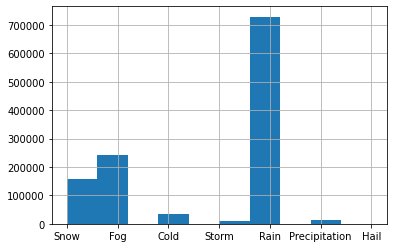

In [48]:
Weather_df["Type"].hist()

<AxesSubplot:xlabel='Type', ylabel='count'>

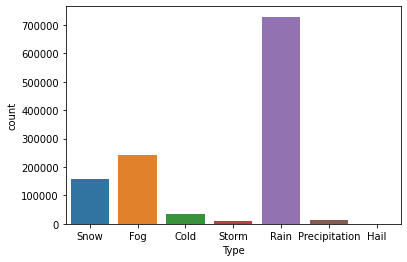

In [62]:
### Visualize the Unique counts
sns.countplot(Weather_df['Type'])